<p><img src="https://cdn.gritglobal.io/uploads/too-broad-customer-segmentation.jpg" width="1000"/></p>

## Segmentacion de Clientes
<p>En esté capitulo nos vamos a enfocar en entender y trabajar un caso de uso para segmentación de clientes, pero antes de eso aquí una pequeña lista de más aplicaciones que se pueden trabajar con los datos recopliados de mis clientes

- Estadística Descriptiva
- Segmentación de Clientes
- Predicción de Abandono
- Valor del Cliente a traves del tiempo (CTLV)

La segmentación la vamos a hacer con base en una metodolgía llamada <b>RFM</b>

</p>

In [1]:
# Importa Pandas, Numpy, Seaborn y Matplotlib
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")
%matplotlib inline

# Importa el archivo "Onxline Retail.csv"

import pandas as pd
datos = pd.read_excel("M30 Online Retail.xlsx")
datos

,INVOICE_NO,STOCK_CODE,DESCRIPTION,QUANTITY,INVOICE_DATE,UNIT_PRICE,CUSTOMER_ID,REGION
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2019-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2019-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2019-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2019-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2019-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2020-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2020-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2020-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2020-12-09 12:50:00,4.15,12680.0,France


In [2]:
# Análisis Exploratorio
#  Primero hacemos un información general del DataFrame
print("-- Información General --")
print(datos.info())

# Para darnos idea de los datos pedimos que nos muestre las primeras y últimas filas del DataFrame
print("-- Primeras 5 filas --")
print(datos.head())
print("\n")

print("-- Últimas 5 filas --")
print(datos.tail())
print("\n")

# Hacemos un resumen estadístico para variables numéricas
print("-- Estadísticas Descriptivas (Variables Numéricas) --")
print(datos.describe())
print("\n")

# Hacemos una verificación de valores nulos lo cual nos va a servir para ver si necesitamos depurar la DF
print("-- Valores Nulos --")
print(datos.isnull().sum())
print("\n")

# Pedimos nos muestre los tipos de datos de cada columna
print("-- Tipos de Datos --")
print(datos.dtypes)
print("\n")

# Tambien hacemos una distribución de variables categóricas
print("-- Distribución de Variables Categóricas --")
for col in datos.select_dtypes(include=['object', 'category']).columns:
    print(f"Distribución de la columna '{col}':")
    print(datos[col].value_counts())
    print("\n")



-- Información General --
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   INVOICE_NO    541909 non-null  object        
 1   STOCK_CODE    541909 non-null  object        
 2   DESCRIPTION   540455 non-null  object        
 3   QUANTITY      541909 non-null  int64         
 4   INVOICE_DATE  541909 non-null  datetime64[ns]
 5   UNIT_PRICE    541909 non-null  float64       
 6   CUSTOMER_ID   406829 non-null  float64       
 7   REGION        541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB
None
-- Primeras 5 filas --
  INVOICE_NO STOCK_CODE                          DESCRIPTION  QUANTITY  \
0     536365     85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1     536365      71053                  WHITE METAL LANTERN         6   
2     536365     84406

**Cómo podemos observar**, este análisis se basará en un conjunto de datos que contiene información sobre las transacciones de clientes, incluyendo:
- CUSTOMER_ID: Identificador único del cliente.
- INVOICE_NO: Número de factura.
- INVOICE_DATE: Fecha de la factura.
- STOCK_CODE: Código del producto.
- DESCRIPTION: Descripción del producto.
- QUANTITY: Cantidad de productos comprados.
- UNIT_PRICE: Precio unitario del producto.
- REGION: Región del cliente.    

**Análisis Exploratorio de Datos (EDA):**
 
 Se realizó un análisis inicial para comprender la estructura, los tipos de datos y la calidad de los datos. Esto incluyó la verificación de valores nulos, la descripción estadística de las variables numéricas y la distribución de las variables categóricas, esto nos sirve para evaluar el comportamiento de los datos, y también nos permite evaluar si se requiere depurar o trabajar previamente nuestra base de Datos

## Recency
<p>Indicador que nos dice que tan reciente es la compra de un cliente</p>

In [3]:
# Previo eliminamos valores nulos  y elimimanos los datos negarivos, para que no causen ruido
datos = datos.dropna()
datos['CUSTOMER_ID'] = datos['CUSTOMER_ID'].astype(int)
datos_reales = datos[datos['QUANTITY'] > 0]

/tmp/ipykernel_4351/2906897163.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos['CUSTOMER_ID'] = datos['CUSTOMER_ID'].astype(int)


In [4]:
# Obtener los clientes unicos
customer_df = datos_reales[['CUSTOMER_ID']].drop_duplicates()

In [5]:
# Obtener la última fecha de compra por cliente
max_purchase =datos_reales.groupby('CUSTOMER_ID')['INVOICE_DATE'].max().reset_index()


In [6]:
# Vamos a calcular nuestra metrica de Recency, esto lo haremos restando los días de la última fecha de compra a cada observacón

# Obtener la fecha más reciente en el dataset
latest_date = datos_reales['INVOICE_DATE'].max()

# Calcular Recency
max_purchase['RECENCY'] = (latest_date - max_purchase['INVOICE_DATE']).dt.days


In [7]:
# Unir el DataFrame de clientes únicos con el que acabamos de crear de la última fecha de compra
customer_r = pd.merge(customer_df, max_purchase, on='CUSTOMER_ID')


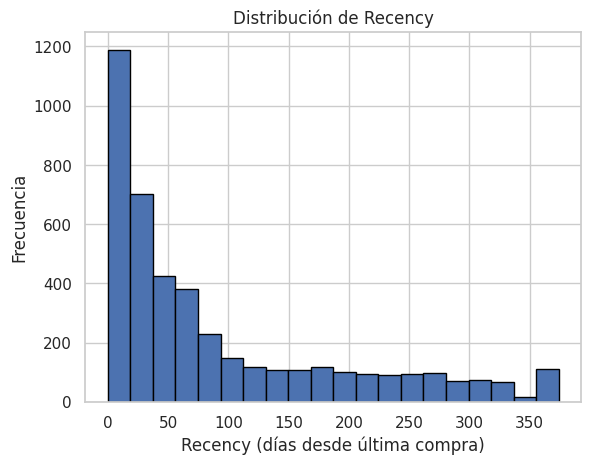

In [8]:
# Grafica un histograma de Recency
plt.hist(customer_r['RECENCY'], bins=20, edgecolor='black')
plt.xlabel("Recency (días desde última compra)")
plt.ylabel("Frecuencia")
plt.title("Distribución de Recency")
plt.show()



In [11]:
# Imprime la Estadística de Resumen para Recency
print(customer_r['RECENCY'].describe())


count    4339.000000
mean       91.592533
std       100.187286
min         0.000000
25%        17.000000
50%        50.000000
75%       141.000000
max       374.000000
Name: RECENCY, dtype: float64


## Frequency
<p>Frecuencia con la que un cliente compra uno o más productos</p>

In [12]:
# Obtener el número de compras por cliente
frequency = datos_reales.groupby('CUSTOMER_ID')['INVOICE_NO'].nunique().reset_index()
frequency.rename(columns={'INVOICE_NO': 'FREQUENCY'}, inplace=True)


In [13]:
# Unir el DataFrame de clientes únicos con el de frecuencia de compra
customer_f = pd.merge(customer_df, frequency, on='CUSTOMER_ID')


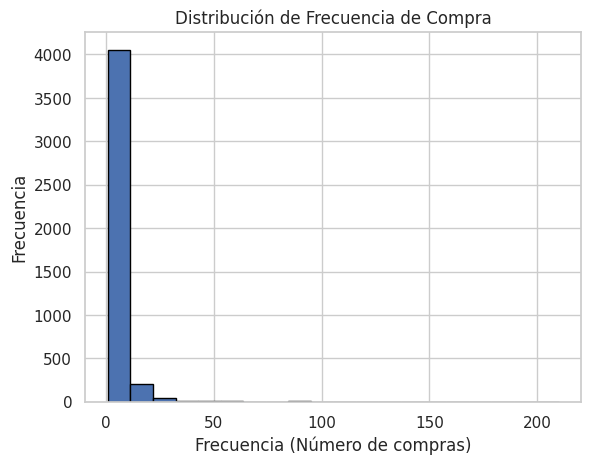

In [14]:
# Graficar un histograma de Frequency
plt.hist(customer_f['FREQUENCY'], bins=20, edgecolor='black')
plt.xlabel("Frecuencia (Número de compras)")
plt.ylabel("Frecuencia")
plt.title("Distribución de Frecuencia de Compra")
plt.show()


In [15]:
# Imprimir Estadística de Resumen para Frequency
print(customer_f['FREQUENCY'].describe())

count    4339.000000
mean        4.271952
std         7.705493
min         1.000000
25%         1.000000
50%         2.000000
75%         5.000000
max       210.000000
Name: FREQUENCY, dtype: float64


## Monetary
<p>Valor del monto total que ha gastado un cliente en la compra de mis productos</p>

In [16]:
# Calcular el monto total por cada compra
datos_reales['MONETARY'] = datos_reales['QUANTITY'] * datos_reales['UNIT_PRICE']


/tmp/ipykernel_4351/443026536.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_reales['MONETARY'] = datos_reales['QUANTITY'] * datos_reales['UNIT_PRICE']


In [17]:
#  Obtener el valor monetario de compra por cliente
monetary = datos_reales.groupby('CUSTOMER_ID')['MONETARY'].sum().reset_index()

In [18]:
# Unir el DataFrame que acabamos de crear con el de los clientes unicos
customer_m = pd.merge(customer_df, monetary, on='CUSTOMER_ID')


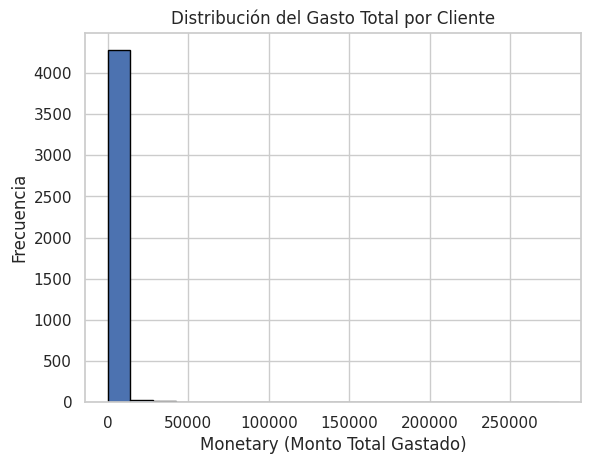

In [19]:
# Grafica un histograma de Monetary

plt.hist(customer_m['MONETARY'], bins=20, edgecolor='black')
plt.xlabel("Monetary (Monto Total Gastado)")
plt.ylabel("Frecuencia")
plt.title("Distribución del Gasto Total por Cliente")
plt.show()


In [20]:
# Imprime la Estadística de Resumen para Monetary
print(customer_m['MONETARY'].describe())


count      4339.000000
mean       2053.793018
std        8988.248381
min           0.000000
25%         307.245000
50%         674.450000
75%        1661.640000
max      280206.020000
Name: MONETARY, dtype: float64


## Algoritmo k-Means
<p>Ya creamos nuestros indicadores principales de la metodología RFM. es hora de hacer <i>Machine Learning</i>. Para ello utilizaremos un algoritmo no supervisado llamado <b>k-Means</b></p>
<p><img src="https://miro.medium.com/max/818/1*fG8u8nV7qR91wDyFDEEV-g.png" width="250"/></p>

In [21]:
# Funcion para ordenar los clusters
def order_cluster(cluster_field_name, target_field_name, datos_reales, ascending):
    new_cluster_field_name = 'new_' + cluster_field_name
    df_new = datos_reales.groupby(cluster_field_name)[target_field_name].mean().reset_index()
    df_new = df_new.sort_values(by=target_field_name, ascending=ascending).reset_index(drop=True)
    df_new['index'] = df_new.index
    df_final = pd.merge(datos_reales, df_new[[cluster_field_name, 'index']], on=cluster_field_name)
    df_final = df_final.drop([cluster_field_name], axis=1)
    df_final = df_final.rename(columns={"index": cluster_field_name})
    return df_final

## Elbow Method
<p>¿Cual es mi número óptimo de clusters? Vamos a contruir una <i>gráfica de codo</i> para averiguarlo</p>

In [22]:
# Importa la librería de kMeans
from sklearn.cluster import KMeans

/home/9e16b0a4-46cf-4ed8-a80e-6fb1cbba99a2/.local/lib/python3.11/site-packages/joblib/externals/loky/backend/context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "/home/9e16b0a4-46cf-4ed8-a80e-6fb1cbba99a2/.local/lib/python3.11/site-packages/joblib/externals/loky/backend/context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")
/tmp/ipykernel_4351/1344964782.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recency["clusters"] = kmeans.labels_  

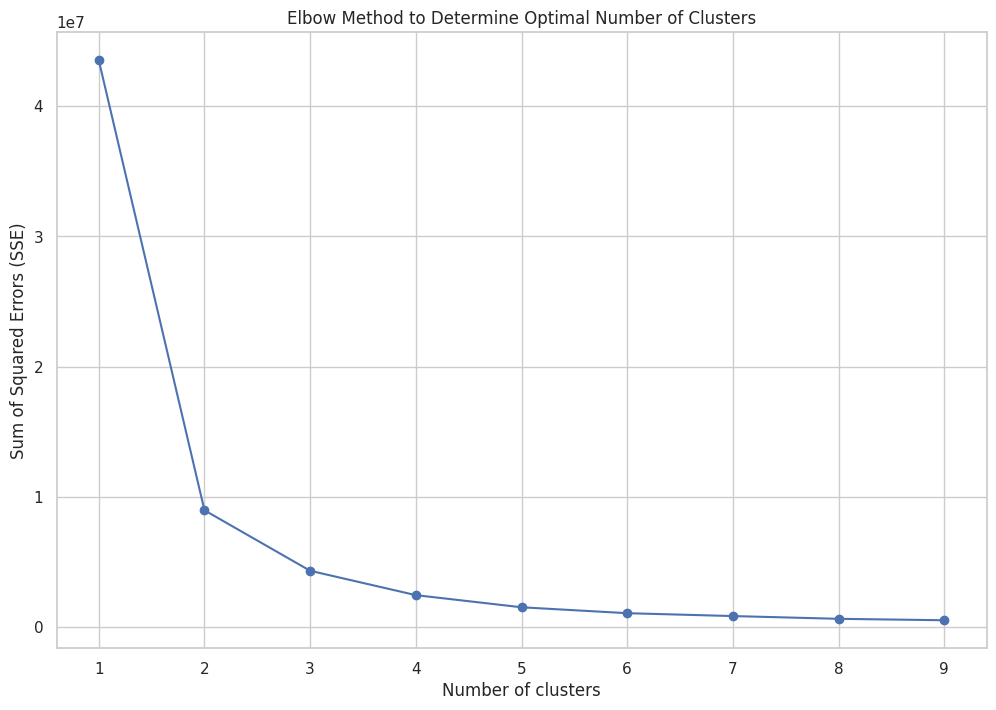

In [23]:
# Configuración inicial - Vamos a tomar como referencia el indicador de Recency
sse = {}  # Diccionario para almacenar la suma de errores cuadrados (SSE) por cada k
recency = customer_r[['RECENCY']]  # Usamos el DataFrame con la columna RECENCY

for k in range(1, 10):  # Iteramos sobre diferentes valores de k (de 1 a 9)
    # Instancia el algoritmo de k-means iterando sobre k
    kmeans = KMeans(n_clusters=k, random_state=42)  # Inicializamos k-means con k clusters
    # Entrena el algoritmo
    kmeans.fit(recency)  # Ajustamos el modelo usando los datos de recency
    # Adjunta las etiquetas
    recency["clusters"] = kmeans.labels_  # Asignamos las etiquetas de cluster a cada punto
    # Adjunta la inercia o variación al arreglo sse
    sse[k] = kmeans.inertia_  # Almacenamos la inercia (suma de distancias al cuadrado)

# Grafico de codo (Elbow)
plt.figure(figsize=(12, 8))
plt.plot(list(sse.keys()), list(sse.values()), marker='o')  # Graficamos SSE vs número de clusters
plt.xlabel("Number of clusters")
plt.ylabel("Sum of Squared Errors (SSE)")
plt.title("Elbow Method to Determine Optimal Number of Clusters")
plt.show()

In [24]:
# Instanciar el algoritmo con 4 clusters para Recency 
kmeans = KMeans(n_clusters=4, random_state=42)

# Entrenar el algoritmo
kmeans.fit(customer_r[['RECENCY']])

# Obtener las predicciones
customer_r['RECENCY_CLUSTER'] = kmeans.labels_

# Ordenar los clusters
customer_r = order_cluster('RECENCY_CLUSTER', 'RECENCY', customer_r, False)

# Estadística Descriptiva del cluster creado
cluster_stats = customer_r.groupby('RECENCY_CLUSTER')['RECENCY'].describe()
print(cluster_stats)


                  count        mean        std    min    25%    50%    75%  \
RECENCY_CLUSTER                                                              
0                 528.0  304.982955  40.905984  245.0  268.0  302.0  335.0   
1                 616.0  185.199675  32.134788  132.0  157.0  184.0  212.0   
2                1078.0   78.119666  22.736747   48.0   59.0   73.0   93.0   
3                2117.0   17.993859  13.146314    0.0    7.0   16.0   28.0   

                   max  
RECENCY_CLUSTER         
0                374.0  
1                244.0  
2                131.0  
3                 47.0  


In [25]:
# Instanciar el algoritmo con 4 clusters para Frequency
kmeans = KMeans(n_clusters=4, random_state=42)

# Entrenar el algoritmo
kmeans.fit(customer_f[['FREQUENCY']])

# Obtener las predicciones
customer_f['FREQUENCY_CLUSTER'] = kmeans.labels_

# Ordenar los clusters
customer_f = order_cluster('FREQUENCY_CLUSTER', 'FREQUENCY', customer_f, True)

# Estadística Descriptiva de los clusters
cluster_stats = customer_f.groupby('FREQUENCY_CLUSTER')['FREQUENCY'].describe()
print(cluster_stats)


                    count        mean        std    min    25%    50%     75%  \
FREQUENCY_CLUSTER                                                               
0                  3639.0    2.331135   1.491222    1.0    1.0    2.0    3.00   
1                   629.0   10.920509   4.101814    7.0    8.0   10.0   13.00   
2                    68.0   38.955882  17.379379   25.0   27.0   32.0   45.25   
3                     3.0  178.333333  47.268735  124.0  162.5  201.0  205.50   

                     max  
FREQUENCY_CLUSTER         
0                    6.0  
1                   24.0  
2                   97.0  
3                  210.0  


In [26]:
# Instanciar el algoritmo con 4 clusters para Monetary
kmeans = KMeans(n_clusters=4, random_state=42)

# Entrenar el algoritmo
kmeans.fit(customer_m[['MONETARY']])

# Obtener las predicciones
customer_m['MONETARY_CLUSTER'] = kmeans.labels_

# Ordenar los clusters
customer_m = order_cluster('MONETARY_CLUSTER', 'MONETARY', customer_m, False)

# Estadística Descriptiva de los clusters
cluster_stats = customer_m.groupby('MONETARY_CLUSTER')['MONETARY'].describe()
print(cluster_stats)

                   count           mean           std        min        25%  \
MONETARY_CLUSTER                                                              
0                    2.0  269931.660000  14530.139257  259657.30  264794.48   
1                    5.0  149828.502000  31848.698231  117379.63  124914.53   
2                   31.0   46393.013871  17870.591823   25977.16   31870.25   
3                 4301.0    1437.855997   2227.271055       0.00     306.13   

                        50%         75%        max  
MONETARY_CLUSTER                                    
0                 269931.66  275068.840  280206.02  
1                 143825.06  168472.500  194550.79  
2                  40991.57   58668.155   91062.38  
3                    664.26    1619.730   21429.39  


## Score de Segmentación
<p>El algoritmo de k-means nos da una segmentación generalizada, pero podemos personalizarla aún más creando una métrica que asigne una calificación al valor del cluster. Esto es lo que vamos a hacer!!</p>

In [29]:
# Previo combinamos todos los DataFrames en uno solo usando 'CUSTOMER_ID' como clave
customer_df = pd.merge(customer_df, customer_r[['CUSTOMER_ID', 'RECENCY_CLUSTER']], on='CUSTOMER_ID')
customer_df = pd.merge(customer_df, customer_f[['CUSTOMER_ID', 'FREQUENCY_CLUSTER']], on='CUSTOMER_ID')
customer_df = pd.merge(customer_df, customer_m[['CUSTOMER_ID', 'MONETARY_CLUSTER']], on='CUSTOMER_ID')

# Vamos a crear nuestro score sumando el valor de cada uno de los clusters
customer_df['SCORE'] = customer_df['RECENCY_CLUSTER'] + customer_df['FREQUENCY_CLUSTER'] + customer_df['MONETARY_CLUSTER']

# Obtener el promedio para cada una de las métricas de las calificaciones creadas (Score)
customer_df['SCORE'].mean()


5.270108319889375

In [31]:
# Crea una funcion que asigne lo siguiente: 
# Si score <= 1 entonces 'Low-Value', si score >1 y <=4 entonces 'Average', si score >4 y <=6 entonces 'Potential', por último si score >6 entonces 'High-Value'
def segment(score):
    if score <= 1:
        return 'Low-Value'
    elif 1 < score <= 4:
        return 'Average'
    elif 4 < score <= 6:
        return 'Potential'
    else:  # score > 6
        return 'High-Value'

# Crear una columna aplicando esta función al campo 'SCORE'
customer_df['SEGMENT'] = customer_df['SCORE'].apply(segment)

In [32]:
# Vamos a dar un vistazo a la tabla final
customer_df.head()

,CUSTOMER_ID,RECENCY_CLUSTER,FREQUENCY_CLUSTER,MONETARY_CLUSTER,SCORE,SEGMENT
0,17850,0,2,3,5,Potential
1,13047,3,1,3,7,High-Value
2,12583,3,1,3,7,High-Value
3,13748,2,0,3,5,Potential
4,15100,0,0,3,3,Average


In [34]:
# Imprime la proporción o el total de clientes por segmento
# Imprimir el total de clientes por segmento
print("Total de clientes por segmento:")
print(customer_df['SEGMENT'].value_counts())

# Imprimir la proporción de clientes por segmento
print("\nProporción de clientes por segmento:")
print(customer_df['SEGMENT'].value_counts(normalize=True))

Total de clientes por segmento:
SEGMENT
Potential     2590
Average       1137
High-Value     612
Name: count, dtype: int64

Proporción de clientes por segmento:
SEGMENT
Potential     0.596912
Average       0.262042
High-Value    0.141046
Name: proportion, dtype: float64


**Distribución de Segmentos:**
- **Potential:** 2590 clientes (59.69%)
- **Average:** 1137 clientes (26.20%)
- **High-Value:** 612 clientes (14.10%)    


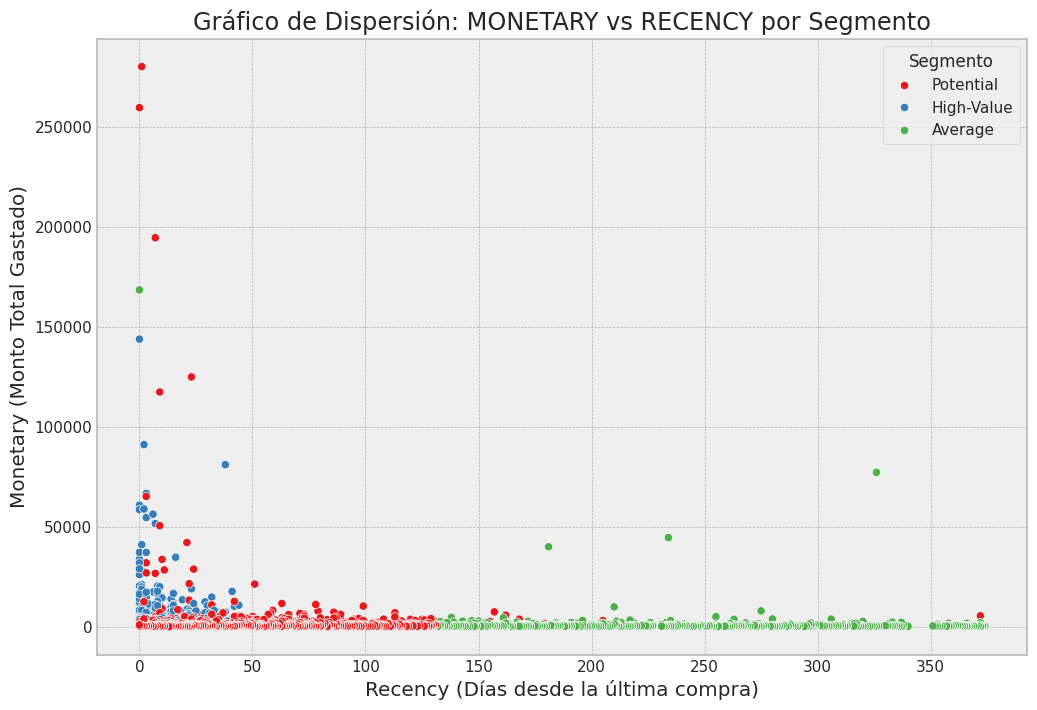

In [48]:
# Define un estilo 'bmh'
plt.style.use('bmh')

# Filtra los valores para RECENCY < 4000
filtered_data = customer_df[customer_df['RECENCY'] < 4000]

# Crea un gráfico de dispersión de 'MONETARY' VS 'RECENCY' por Segmento
plt.figure(figsize=(12, 8))
sns.scatterplot(data=filtered_data, x='RECENCY', y='MONETARY', hue='SEGMENT', palette='Set1')
plt.title("Gráfico de Dispersión: MONETARY vs RECENCY por Segmento")
plt.xlabel("Recency (Días desde la última compra)")
plt.ylabel("Monetary (Monto Total Gastado)")
plt.legend(title="Segmento")
plt.show()

**Análisis**
La gráfica explora cómo la "Recencia" (lo más reciente que un cliente realizó una compra) se relaciona con el "Monto Total Gastado" por ese cliente, loa Clientes de Alto Valor ("High-Value") se ubican en el segmento azul oscuro (presumiblemente "High-Value") tienden a mostrar una combinación de "Recencia" baja (compran más recientemente) y un "Monto Total Gastado" alto. Están ubicados predominantemente en la parte inferior izquierda y en la parte izquierda central de la gráfica. ahora los cientes Potenciales ("Potential") que son el segmento azul claro (presumiblemente "Potential") muestran una dispersión más amplia. Algunos de estos clientes han gastado montos significativos, pero su "Recencia" varía más sin embargo los clientes Promedio ("Average") que estan señalados en el segmento rojo (presumiblemente "Average") generalmente muestran un "Monto Total Gastado" más bajo en comparación con los otros segmentos, y su "Recencia" también varía, aunque muchos muestran una recencia relativamente alta.    

También opbservamos que hay una alta concentración de clientes con baja "Recencia" (menos de 100 días) y un "Monto Total Gastado" que varía desde bajo hasta moderado y que algunos outliers con muy alto "Monto Total Gastado", especialmente entre los clientes con baja "Recencia".


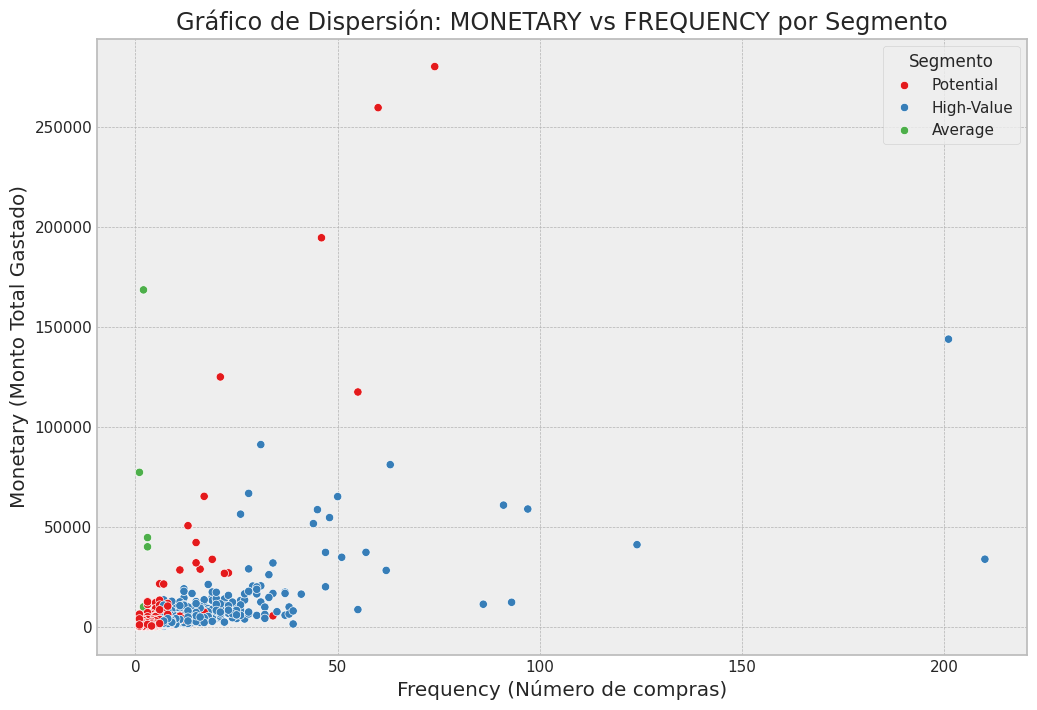

In [39]:

# Crea un gráfico de dispersión de 'MONETARY' vs 'FREQUENCY' por Segmento
plt.figure(figsize=(12, 8))
sns.scatterplot(data=filtered_data, x='FREQUENCY', y='MONETARY', hue='SEGMENT', palette='Set1')
plt.title("Gráfico de Dispersión: MONETARY vs FREQUENCY por Segmento")
plt.xlabel("Frequency (Número de compras)")
plt.ylabel("Monetary (Monto Total Gastado)")
plt.legend(title="Segmento")
plt.show()

**Analisis:**
El análisis revela una correlación positiva general entre la frecuencia de compra y el gasto total, lo que indica que los clientes que realizan compras con mayor frecuencia tienden a invertir mayores sumas de dinero. Específicamente, los clientes de alto valor se concentran en la región superior derecha del gráfico, lo que confirma su característica de alta frecuencia de compra y elevado gasto. En contraste, los clientes promedio se agrupan en la parte inferior izquierda, lo que refleja un menor nivel tanto en frecuencia de compra como en gasto. Los clientes potenciales, por su parte, se distribuyen más ampliamente a lo largo del espectro, lo que sugiere la oportunidad de incrementar su gasto y frecuencia de compra.

En resumen, el gráfico proporciona una representación visual clara de la relación entre la frecuencia de compra y el gasto total, y la distribución de los distintos segmentos de clientes en función de estas métricas